<a href="https://www.kaggle.com/code/erhanalasar/deep-learninng-with-python-book?scriptVersionId=215973758" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="text-align: center;">
    <img src="https://m.media-amazon.com/images/I/41x+Po0BUqL._SX342_SY445_PQ10_.jpg" alt="Deep Learning" style="width:50%;"/>
</div>

### This notebook contains my studies with the Deep Learning with Python book from François Chollet
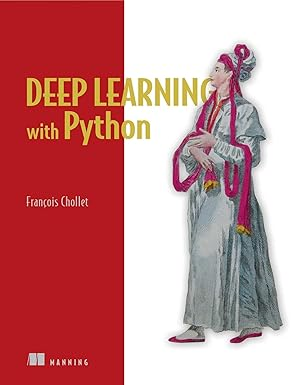

### Creating a 2 Layer Model using Sequential

In [ ]:
from tensorflow.keras import layers, models, optimizers

### Creating The Same Model Using Functional API

In [ ]:
input_tensor = layers.Input(shape=(784,))
x = layers.Dense(3, activation='relu')(input_tensor)
output_tensor = layers.Dense(10, activation = 'softmax')(x)

model = models.Model(inputs=input_tensor, outputs = output_tensor)

### Model Optimizing Example

In [ ]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss='mse',
              metrics=['accuracy'])

# Binary Classification with IMDB Dataset

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# num_words parametresi ile en sık tekrar eden 10000 örneği saklayıp nadir örnekleri göz ardı ediyoruz.
# Bu yönteilebilir bir veri seti ile çalışma imkanı sağlayacak.

In [ ]:
train_data[0][0:5], train_labels[0]

In [ ]:
# Kelimeler yukarıda görüleceği üzere index numarası şeklinde tutuluyor. Tekrar ingilizce kelimelere çevirmek için:

# word_index kelimeleri bir tamsayı indeks değerine eşleyen sözlüktür.
word_index = imdb.get_word_index() 

# tam sayı indeksleri kelimelere dönüştürür.
reverse_word_index = dict([value,key] for (key,value) in word_index.items())

In [ ]:
decoded_review = ' '.join(reverse_word_index.get(i - 3, '?') for i in train_data[0])

# Indeks değerlerini3 atlayarak alıyoruz çünkü 0,1 ve 2 sırasıyla yapılan sıfır eklemelerini, dizinin başlangıcını ve bilinmeyenleri kodlamak için
# ayrılmıştır.

In [ ]:
decoded_review

### Preparing Data

#### ONE HOT ENCODING

In [ ]:
import numpy as np

In [ ]:
def vectorize_sequences(sequences, dimension = 10000):
    # (len(sequences), dimension) şeklinde tüm elemanları sıfır olan matris oluşturur.
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i,sequence] = 1 # results[i]'nin indekslerini 1 yapar.
    return results

In [ ]:
X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)

In [ ]:
# labelları vektör haline getirme
y_train = np.asarray(train_labels).astype('float')
y_test = np.asarray(test_labels).astype('float')

### Building the network

In [ ]:
from keras.layers import Input

In [ ]:
model = models.Sequential()
model.add(Input(shape=(10000,)))  # İlk katman olarak Input ekleniyor
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

### Compiling the Model

In [ ]:
model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics=['accuracy'])

### Validation Dataset Creation

In [ ]:
X_val = X_train[:10000]
partial_x_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]


### Model Training

In [ ]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data =(X_val,y_val))

In [ ]:
history_dict = history.history
history_dict.keys()

### Plotting Train and Validation Losses

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1,len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Train Loss') #"bo" for blue circle
plt.plot(epochs, val_loss_values, 'b', label='Test Loss') # "b" for blue
plt.title('Train and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Plotting Train and Validation Accuracy

In [ ]:
plt. clf() # clears the shape

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc,'bo', label = 'Train Accuracy')
plt.plot(epochs, val_acc,'b',label ='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### Train the model from the beginning

In [ ]:
model = models.Sequential()
model.add(Input(shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics = ['accuracy'])

model.fit(X_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(X_test,y_test)

# NEWS CLASSIFICATION: MULTI CLASSIFICATION SAMPLE

### Uploading Reuters Dataset

In [1]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
len(train_data), len(test_data)
# 8982 train, 2246 test data

(8982, 2246)

In [6]:
train_data[10]
# every sample is a list of containing integers and can be turned into text

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

### Turning back into text

In [7]:
word_index = reuters.get_word_index()
reverse_word_index = dict([value, key] for (key,value) in word_index.items())
decoded_newswire = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

550378/550378 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step


### Preparing the dataset

In [10]:
import numpy as np 
def vectorize_sequences(sequences, dimesion = 10000):
    results = np.zeros((len(sequences), dimesion))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# Eğitim verisinin vektöre dönüştürülmesi
x_train = vectorize_sequences(train_data)

# Test verisinin vektöre dönüştürülmesi
x_test = vectorize_sequences(test_data)


In [14]:
from keras.utils import to_categorical # one hot encoding için

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

### Building the network

In [19]:
from keras import layers, models

model = models.Sequential()
model.add(layers.Input(shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

### Compiling the Model

In [20]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

### Creating validation set

In [26]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

### Training the model

In [27]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs = 20,
                   batch_size=512,
                   validation_data = (x_val, y_val))

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.3843 - loss: 3.2223 - val_accuracy: 0.6010 - val_loss: 1.8531
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.6583 - loss: 1.6441 - val_accuracy: 0.6820 - val_loss: 1.4158
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.7209 - loss: 1.2403 - val_accuracy: 0.7310 - val_loss: 1.2322
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.7741 - loss: 1.0161 - val_accuracy: 0.7480 - val_loss: 1.1222
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8059 - loss: 0.8835 - val_accuracy: 0.7830 - val_loss: 1.0598
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.8478 - loss: 0.7250 - val_accuracy: 0.7870 - val_loss: 0.9875
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.8675 - loss: 0.6176 - val_accuracy: 0.8030 - val_loss: 0.9604
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8935 - loss: 0.5022 - val_accuracy: 0.8120 - v

### Plotting Train and Test Losses

In [28]:
import matplotlib.pyplot as plt

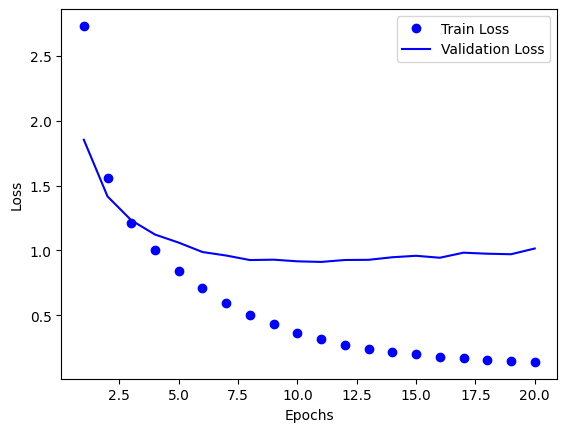

In [29]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Train Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Plotting Train and Validation Accuracy

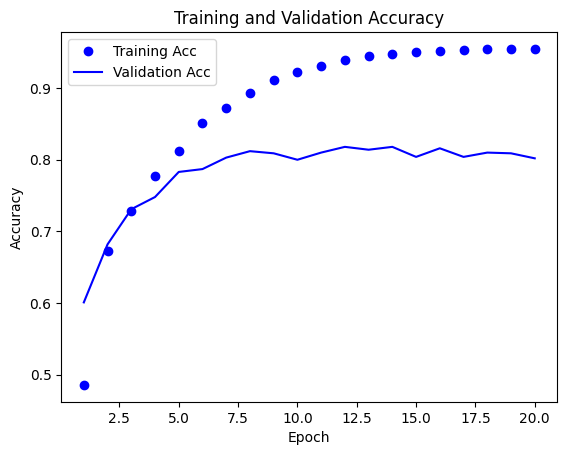

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label = 'Training Acc')
plt.plot(epochs, val_acc, 'b', label ='Validation Acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Train the model from the beginning

In [33]:
model = models.Sequential()
model.add(layers.Input(shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model.fit(partial_x_train,
         partial_y_train,
         epochs = 9,
         batch_size=512,
         validation_data = (x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.3833 - loss: 3.2086 - val_accuracy: 0.6130 - val_loss: 1.8450
Epoch 2/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.6594 - loss: 1.6312 - val_accuracy: 0.6870 - val_loss: 1.3917
Epoch 3/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.7313 - loss: 1.2244 - val_accuracy: 0.7380 - val_loss: 1.1886
Epoch 4/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7836 - loss: 0.9948 - val_accuracy: 0.7770 - val_loss: 1.0767
Epoch 5/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8312 - loss: 0.8014 - val_accuracy: 0.7910 - val_loss: 0.9922
Epoch 6/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.8505 - loss: 0.6834 - val_accuracy: 0.7930 - val_loss: 0.9485
Epoch 7/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8805 - loss: 0.5556 - val_accuracy: 0.7920 - val_loss: 0.9385
Epoch 8/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9011 - loss: 0.4635 - val_accuracy: 0.8020 - val_loss:

In [34]:
results

[0.9404062032699585, 0.7871772050857544]

### Predicting new values

In [36]:
predictions = model.predict(x_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
